In [1]:
'''
    순서 
    (1) 데이터 로드
    (2) 데이터 info로 결측치 확인 -> 만약에 결측치 있으면 dropna나 fillna로 처리
    (3) heatmap 그리기
    (4) target값을 value_counts하여 빈도수 체크 -> (분류라면) train_test_split 시에 stratify 옵션 넣기
    (5) X, y 나누기
    (6) X를 StandardScaler로 정규화
    (7) train_test_split으로 X_train, X_test, y_train, y_test 만들기
    (8) 모든 classifier, regressor 동원해서 do_classification or do_regression 만들기
    (9) (성능이 좋지 않다면) PolynormialFeatures 도입하여 차수 늘린 후 다시 학습
'''

'\n    순서 \n    (1) 데이터 로드\n    (2) 데이터 info로 결측치 확인 -> 만약에 결측치 있으면 dropna나 fillna로 처리\n    (3) heatmap 그리기\n    (4) target값을 value_counts하여 빈도수 체크 -> (분류라면) train_test_split 시에 stratify 옵션 넣기\n    (5) X, y 나누기\n    (6) X를 StandardScaler로 정규화\n    (7) train_test_split으로 X_train, X_test, y_train, y_test 만들기\n    (8) 모든 classifier, regressor 동원해서 do_classification or do_regression 만들기\n    (9) (성능이 좋지 않다면) PolynormialFeatures 도입하여 차수 늘린 후 다시 학습\n'

In [2]:
import pandas as pd
import sklearn
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../../data/california_house_prices.csv")
df.head(10)

,Unnamed: 0,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [4]:
df = df.drop('Unnamed: 0', axis=1)
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'PRICE'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<Axes: >

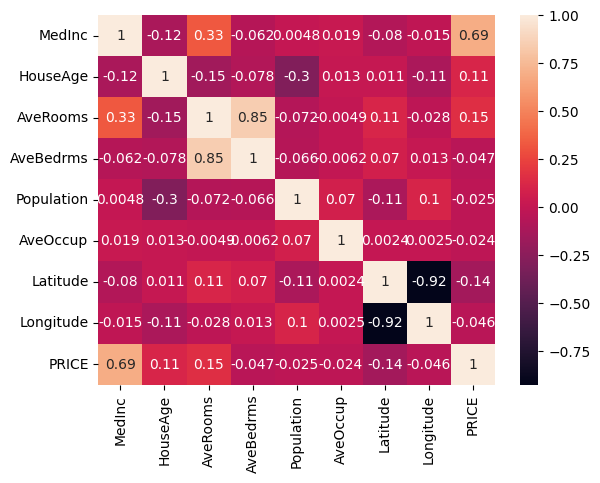

In [7]:
corr = df.corr()
sns.heatmap(corr, annot=True)

In [8]:
X, y = df[[feature for feature in df.columns if feature != "PRICE"]], df['PRICE']

print (X.shape, y.shape)

(20640, 8) (20640,)


In [9]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
X = SS.fit_transform(X)

X

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   shuffle=True)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(16512, 8) (16512,)
(4128, 8) (4128,)


In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR

# MSE, MAE 기준
def do_regression(X_train, X_test, y_train, y_test) :
    # KNR
    print ("KNR")
    best_KNR, best_score = 0, 0
    for i in range (1, 51) :
        KNR = KNeighborsRegressor(n_jobs=-1, n_neighbors=i)
        KNR.fit(X_train, y_train)
        y_train_pred = KNR.predict(X_train)
        y_test_pred = KNR.predict(X_test)
        train_MSE, train_MAE = mean_squared_error(y_train_pred, y_train), mean_absolute_error(y_train_pred, y_train)
        test_MSE, test_MAE = mean_squared_error(y_test_pred, y_test), mean_absolute_error(y_test_pred, y_test)
        
        print (f"{i} : train_MSE : {train_MSE} | test_MSE : {test_MSE}")
        if i == 1 :
            best_KNR = KNR
            best_score = test_MSE
        
        else : 
            if best_score >= test_MSE : 
                best_KNR = KNR
                best_score = test_MSE
    print ("KNR : best_score =", best_score)
    
    print ()
    
    # LR
    print ("LR")
    LR = LinearRegression(n_jobs=-1, )
    LR.fit(X_train, y_train)
    y_train_pred = LR.predict(X_train)
    y_test_pred = LR.predict(X_test)
    train_MSE, train_MAE = mean_squared_error(y_train_pred, y_train), mean_absolute_error(y_train_pred, y_train)
    test_MSE, test_MAE = mean_squared_error(y_test_pred, y_test), mean_absolute_error(y_test_pred, y_test)
    r2 = r2_score(y_test, y_test_pred)  # R² score
    print ("R² score :", r2)
    print ("LR : train MSE, MAE", [train_MSE, train_MAE])
    print ("LR : test MSE, MAE", [test_MSE, test_MAE])
    
    print ()
    
    # ridge
    print ("ridge")
    ridge = Ridge(max_iter=1000)
    ridge.fit(X_train, y_train)
    y_train_pred = ridge.predict(X_train)
    y_test_pred = ridge.predict(X_test)
    train_MSE, train_MAE = mean_squared_error(y_train_pred, y_train), mean_absolute_error(y_train_pred, y_train)
    test_MSE, test_MAE = mean_squared_error(y_test_pred, y_test), mean_absolute_error(y_test_pred, y_test)
    r2 = r2_score(y_test, y_test_pred)  # R² score
    print ("R² score :", r2)
    print ("ridge : train MSE, MAE", [train_MSE, train_MAE])
    print ("ridge : test MSE, MAE", [test_MSE, test_MAE])
    print ()
    
    # lasso
    print ("lasso")
    lasso = Lasso(max_iter=1000)
    lasso.fit(X_train, y_train)
    y_train_pred = lasso.predict(X_train)
    y_test_pred = lasso.predict(X_test)
    train_MSE, train_MAE = mean_squared_error(y_train_pred, y_train), mean_absolute_error(y_train_pred, y_train)
    test_MSE, test_MAE = mean_squared_error(y_test_pred, y_test), mean_absolute_error(y_test_pred, y_test)
    r2 = r2_score(y_test, y_test_pred)  # R² score
    print ("R² score :", r2)
    print ("lasso : train MSE, MAE", [train_MSE, train_MAE])
    print ("lasso : test MSE, MAE", [test_MSE, test_MAE])
    print ()
    
    # DT
    print ("DT")
    DT = DecisionTreeRegressor(max_depth=1000, max_leaf_nodes=1000, 
                               max_features=10, min_samples_leaf=10, 
                               min_samples_split=50)
    DT.fit(X_train, y_train)
    y_train_pred = DT.predict(X_train)
    y_test_pred = DT.predict(X_test)
    train_MSE, train_MAE = mean_squared_error(y_train_pred, y_train), mean_absolute_error(y_train_pred, y_train)
    test_MSE, test_MAE = mean_squared_error(y_test_pred, y_test), mean_absolute_error(y_test_pred, y_test)
    r2 = r2_score(y_test, y_test_pred)  # R² score
    print ("R² score :", r2)
    print ("DT : train MSE, MAE", [train_MSE, train_MAE])
    print ("DT : test MSE, MAE", [test_MSE, test_MAE])
    print ()
    
    # RF
    print ("RF")
    RF = RandomForestRegressor(max_depth=1000, max_leaf_nodes=1000, 
                               max_features=10, min_samples_leaf=20, 
                               min_samples_split=50)
    RF.fit(X_train, y_train)
    y_train_pred = RF.predict(X_train)
    y_test_pred = RF.predict(X_test)
    train_MSE, train_MAE = mean_squared_error(y_train_pred, y_train), mean_absolute_error(y_train_pred, y_train)
    test_MSE, test_MAE = mean_squared_error(y_test_pred, y_test), mean_absolute_error(y_test_pred, y_test)
    r2 = r2_score(y_test, y_test_pred)  # R² score
    print ("R² score :", r2)
    print ("RF : train MSE, MAE", [train_MSE, train_MAE])
    print ("RF : test MSE, MAE", [test_MSE, test_MAE])
    print ()
    
    # adaboost
    print ("adaboost")
    adaboost = AdaBoostRegressor(n_estimators=1000, learning_rate=0.001)
    adaboost.fit(X_train, y_train)
    y_train_pred = adaboost.predict(X_train)
    y_test_pred = adaboost.predict(X_test)
    train_MSE, train_MAE = mean_squared_error(y_train_pred, y_train), mean_absolute_error(y_train_pred, y_train)
    test_MSE, test_MAE = mean_squared_error(y_test_pred, y_test), mean_absolute_error(y_test_pred, y_test)
    r2 = r2_score(y_test, y_test_pred)  # R² score
    print ("R² score :", r2)
    print ("adaboost : train MSE, MAE", [train_MSE, train_MAE])
    print ("adaboost : test MSE, MAE", [test_MSE, test_MAE])
    print ()
    
    # gradient
    print ("gradient")
    gradient = GradientBoostingRegressor(max_depth=1000, max_features=10, 
                                         n_estimators=1000, learning_rate=0.001)
    gradient.fit(X_train, y_train)
    y_train_pred = gradient.predict(X_train)
    y_test_pred = gradient.predict(X_test)
    train_MSE, train_MAE = mean_squared_error(y_train_pred, y_train), mean_absolute_error(y_train_pred, y_train)
    test_MSE, test_MAE = mean_squared_error(y_test_pred, y_test), mean_absolute_error(y_test_pred, y_test)
    r2 = r2_score(y_test, y_test_pred)  # R² score
    print ("R² score :", r2)
    print ("gradient : train MSE, MAE", [train_MSE, train_MAE])
    print ("gradient : test MSE, MAE", [test_MSE, test_MAE])
    print ()
    
    # SGD
    print ("SGD")
    SGD = SGDRegressor(max_iter=1000)
    SGD.fit(X_train, y_train)
    y_train_pred = SGD.predict(X_train)
    y_test_pred = SGD.predict(X_test)
    train_MSE, train_MAE = mean_squared_error(y_train_pred, y_train), mean_absolute_error(y_train_pred, y_train)
    test_MSE, test_MAE = mean_squared_error(y_test_pred, y_test), mean_absolute_error(y_test_pred, y_test)
    r2 = r2_score(y_test, y_test_pred)  # R² score
    print ("R² score :", r2)
    print ("SGD : train MSE, MAE", [train_MSE, train_MAE])
    print ("SGD : test MSE, MAE", [test_MSE, test_MAE])
    print ()
    
    # XGBoost
    XGBoost = XGBRegressor()
    XGBoost.fit(X_train, y_train)
    y_train_pred = XGBoost.predict(X_train)
    y_test_pred = XGBoost.predict(X_test)
    train_MSE, train_MAE = mean_squared_error(y_train_pred, y_train), mean_absolute_error(y_train_pred, y_train)
    test_MSE, test_MAE = mean_squared_error(y_test_pred, y_test), mean_absolute_error(y_test_pred, y_test)
    r2 = r2_score(y_test, y_test_pred)  # R² score
    print ("R² score :", r2)
    print ("XGBoost : train MSE, MAE", [train_MSE, train_MAE])
    print ("XGBoost : test MSE, MAE", [test_MSE, test_MAE])
    print ()   

do_regression (X_train, X_test, y_train, y_test)


KNR
1 : train_MSE : 0.0 | test_MSE : 0.6238967667244427
2 : train_MSE : 0.1638265704419952 | test_MSE : 0.4796561689966448
3 : train_MSE : 0.2219091823208979 | test_MSE : 0.4556884432324855
4 : train_MSE : 0.25364555504336084 | test_MSE : 0.436885936906577
5 : train_MSE : 0.2735775714791529 | test_MSE : 0.4314678207366831
6 : train_MSE : 0.2893696650300031 | test_MSE : 0.4251616650456045
7 : train_MSE : 0.30211375926170236 | test_MSE : 0.4204315646993444
8 : train_MSE : 0.31102705367272665 | test_MSE : 0.4159908892694836
9 : train_MSE : 0.3212390537948294 | test_MSE : 0.414160286860935
10 : train_MSE : 0.32725659476183855 | test_MSE : 0.41313817883933623
11 : train_MSE : 0.333185920854758 | test_MSE : 0.41374492528059054
12 : train_MSE : 0.33848999704838284 | test_MSE : 0.4149782827099623
13 : train_MSE : 0.3434578453172187 | test_MSE : 0.41607243096622637
14 : train_MSE : 0.3474088418146061 | test_MSE : 0.4199491984601917
15 : train_MSE : 0.35095330174322037 | test_MSE : 0.41988139645